<a href="https://colab.research.google.com/github/Kellybrackets/Python-for-Data-Science/blob/main/machine%20learning%20learning%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data preparation



### Data separation as X and y

In [2]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [3]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data splitting

In [6]:
# Example with sample data
import numpy as np
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [7]:
print(X_train.shape)
print(X_test.shape)

(80, 5)
(20, 5)


In [8]:

X_train

array([[0.6930595 , 0.67895836, 0.39052501, 0.74942273, 0.66992744],
       [0.7380428 , 0.2565925 , 0.62889518, 0.10610555, 0.7266825 ],
       [0.60308036, 0.58353172, 0.55412761, 0.16450063, 0.46438557],
       [0.45492869, 0.13863274, 0.20600381, 0.74100571, 0.3039346 ],
       [0.40796233, 0.89768578, 0.95292342, 0.51770548, 0.28819038],
       [0.70216733, 0.51607832, 0.88274142, 0.21671501, 0.89854714],
       [0.27964079, 0.11006125, 0.47639689, 0.49298185, 0.6855216 ],
       [0.17157053, 0.85015978, 0.89245105, 0.95884705, 0.91916687],
       [0.92201526, 0.69822229, 0.55370429, 0.68358344, 0.55369096],
       [0.66793655, 0.68117394, 0.76811492, 0.97652642, 0.4573417 ],
       [0.15690138, 0.89357057, 0.21207467, 0.34544349, 0.98216552],
       [0.63485374, 0.04708496, 0.816903  , 0.87405799, 0.43747076],
       [0.82415665, 0.90949916, 0.51201087, 0.14771442, 0.27106944],
       [0.10981628, 0.21086915, 0.8225683 , 0.1908194 , 0.13721116],
       [0.26519779, 0.1157276 , 0.

In [9]:

X_test

array([[0.69932344, 0.92923338, 0.20780179, 0.11533023, 0.52387687],
       [0.54041981, 0.45275234, 0.63882447, 0.32746155, 0.09778177],
       [0.23539508, 0.74985405, 0.23331877, 0.65493142, 0.43204971],
       [0.02386023, 0.51179498, 0.82931785, 0.84344873, 0.09754925],
       [0.65484961, 0.45340697, 0.74108886, 0.82074131, 0.94075886],
       [0.50909854, 0.21420566, 0.30298074, 0.52528742, 0.22438166],
       [0.83143208, 0.57585246, 0.75147339, 0.77009555, 0.05919837],
       [0.86679134, 0.40477568, 0.03452752, 0.13361031, 0.50101736],
       [0.98746779, 0.8519166 , 0.08005506, 0.68525087, 0.34633568],
       [0.64972361, 0.52874758, 0.05136234, 0.78526186, 0.74171992],
       [0.83190565, 0.60833911, 0.33246144, 0.60526043, 0.90393144],
       [0.73214847, 0.58544337, 0.17844595, 0.07937503, 0.79432732],
       [0.08126283, 0.76354095, 0.39010799, 0.98206412, 0.61544971],
       [0.60623381, 0.51655318, 0.96390417, 0.5453343 , 0.7488559 ],
       [0.09909389, 0.23675235, 0.

## Model Building

### Linear Regression

#### Training the model

In [10]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Applying the model to make a prediction

In [11]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [13]:
y_lr_train_pred

array([0.460304  , 0.46442125, 0.4139423 , 0.44844435, 0.44208255,
       0.50831265, 0.54151066, 0.61092318, 0.41682612, 0.47004768,
       0.52852146, 0.50823781, 0.32672625, 0.46648723, 0.43639691,
       0.45368137, 0.38216332, 0.38462212, 0.45801189, 0.53271895,
       0.35389607, 0.42423934, 0.56691519, 0.41915398, 0.51424977,
       0.32252489, 0.50637613, 0.48163739, 0.54757754, 0.30352757,
       0.54419903, 0.35910037, 0.48408624, 0.48656005, 0.3968603 ,
       0.49590101, 0.44103769, 0.48266159, 0.35644735, 0.41365427,
       0.45023443, 0.38931207, 0.39473758, 0.51052443, 0.49914612,
       0.55646094, 0.53459489, 0.46149534, 0.4037965 , 0.50661384,
       0.55142343, 0.45364441, 0.53905242, 0.44281197, 0.57520024,
       0.4171207 , 0.4528889 , 0.67504138, 0.42018834, 0.49821366,
       0.41347043, 0.44418418, 0.62212383, 0.51069191, 0.50368971,
       0.39007951, 0.40847021, 0.45602226, 0.45887741, 0.29685625,
       0.42589903, 0.47426623, 0.47276429, 0.36200851, 0.56497

In [14]:
y_lr_test_pred

array([0.36073946, 0.38455137, 0.4555309 , 0.49705007, 0.55725648,
       0.41497557, 0.37135868, 0.35758053, 0.32801423, 0.46562652,
       0.47317816, 0.42081136, 0.54041758, 0.52349375, 0.56615523,
       0.51808762, 0.44682739, 0.47381536, 0.43723251, 0.4657585 ])

#### Evaluate model performance

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [16]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.24340892947676443
LR R2 (Train):  0.02085660047058946
LR MSE (Test):  0.2628722523281445
LR R2 (Test):  -0.09530105136726852


In [18]:
# First import pandas
import pandas as pd


# Then create your DataFrame
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [19]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.243409,0.020857,0.262872,-0.095301


## Random Forest

### Training the model

In [20]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

## Applying the model to make a prediction

In [21]:

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

## Evaluate model performance

In [22]:

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [23]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.19036,0.234252,0.298224,-0.242602


## Model comparison

In [24]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [25]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.243409,0.020857,0.262872,-0.095301
1,Random forest,0.19036,0.234252,0.298224,-0.242602


## Data visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

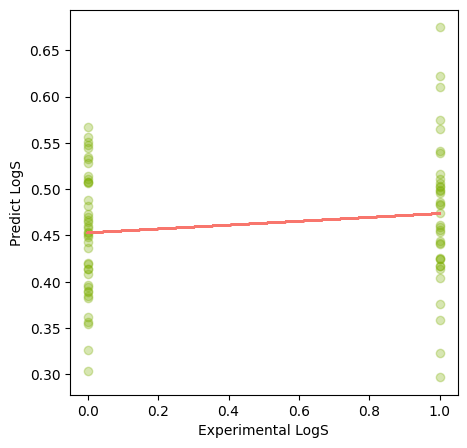

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')